# Свойства статистик. Исследование свойств различных оценок параметров распределений. Информация Фишера и оценка Рао-Крамера
---


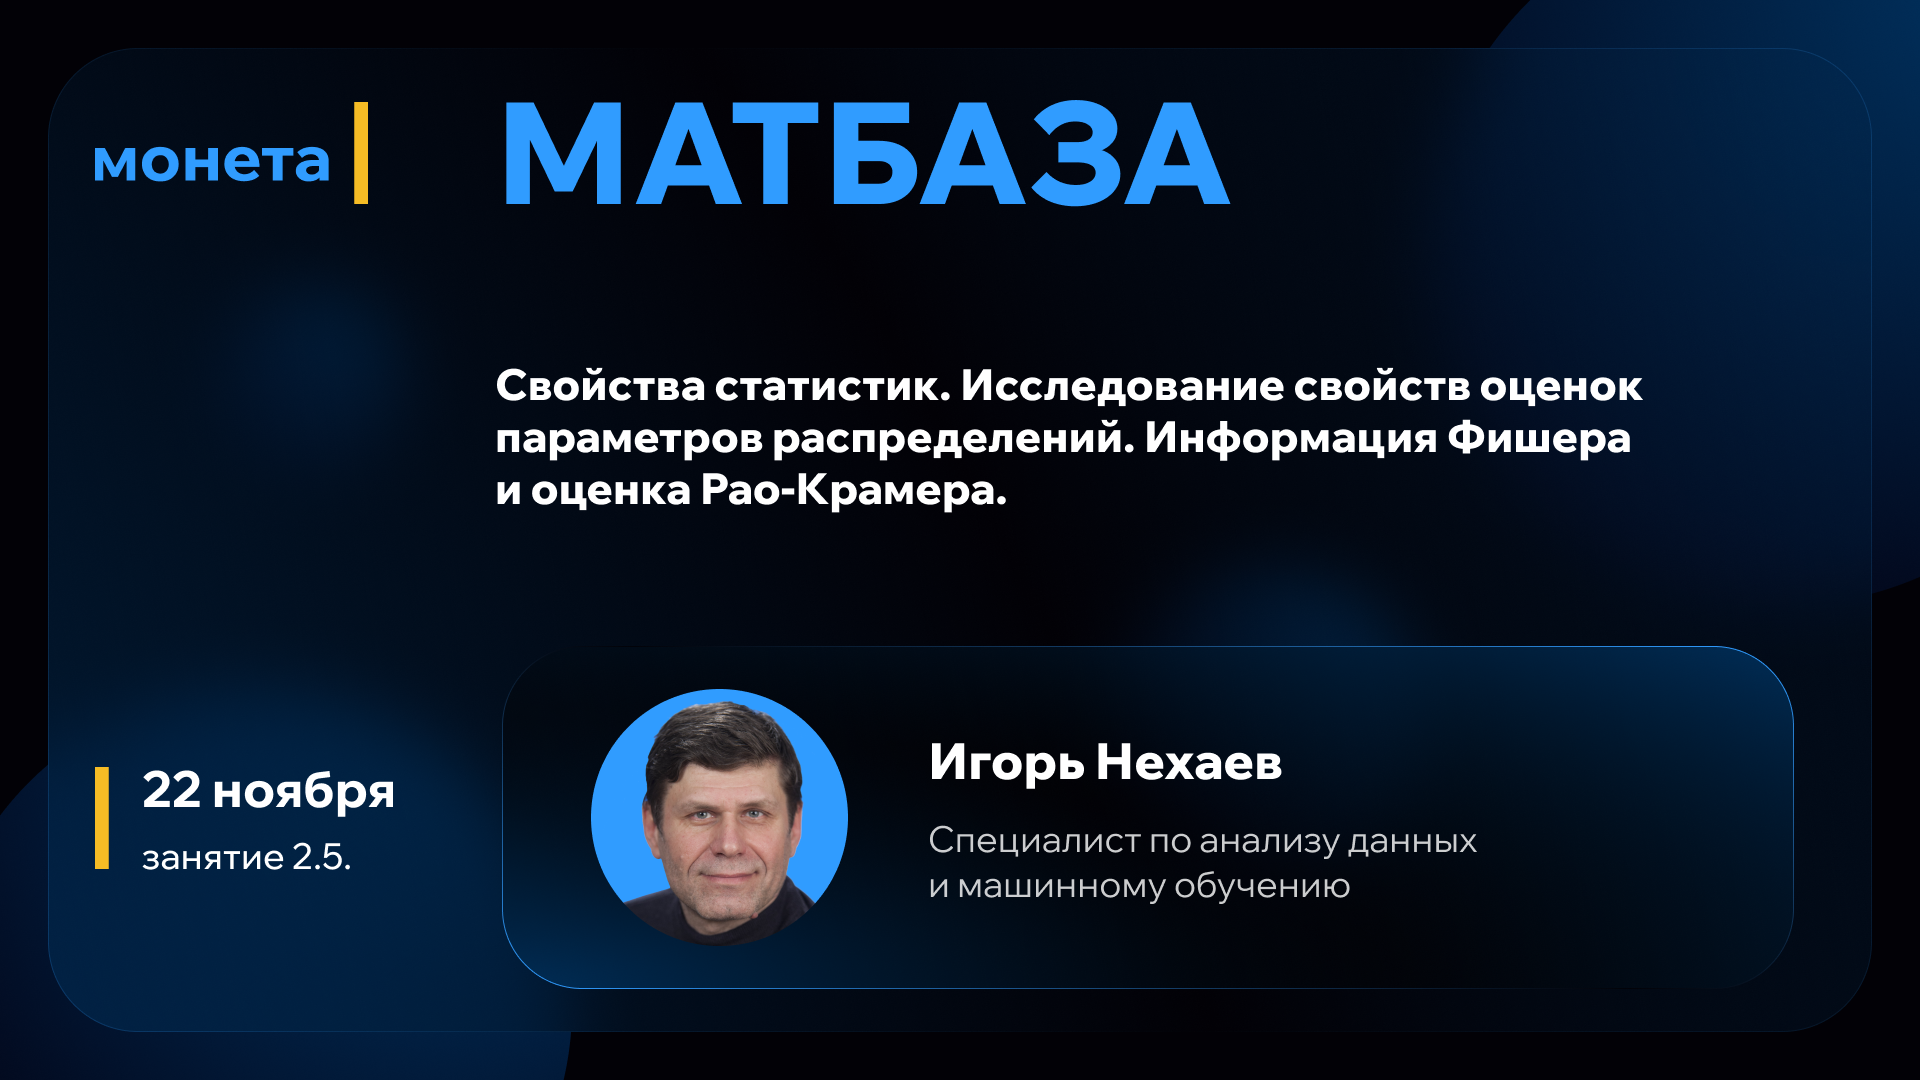

> - Свойства статистик: состоятельность, несмещенность, эффективность;
> - Исследование свойств различных оценок параметров распределений;
> - Выбор лучших статистик. Информация Фишера. Нижняя граница дисперсии несмещенной оценки Рао-Крамера

## **Изучаем распределения разных оценок для генерального среднего**
---
Пусть у нас есть выборка СВ "Время подключения клиентов по заявкам в 2023 году" объемом n: $\bar X = (X_1, X_2, ..., X_n)$.

Какая статистика будет лучше для оценки генерального среднего?

Рассмотрим две статистики:
- выборочное среднее, она нам хорошо известна
$$\bar x_{выб} = \frac {X_1 + X_2 + ... + X_n}{n}$$

- среднее арифметическое минимума и максимума выборки:
$$\bar x_{мм} = \frac {min(\bar X) + max(\bar X)}{2}$$

Забегая вперед скажу, что далее мы выведем свойства оценок и докажем, что выборочное среднее - наилучшая оценка генерального среднего из всех.

А сейчас мы ограничимся экспериментом - построим эмпирические распределения данных оценок и сравним их.


**Описание эксперимента**

Чтобы построить закон распределения оценки (статистики) надо:
1. провести много наблюдений ее значений. Одно наблюдение состоит в следующем:
- получение выборки объема n из данной ГС: $(x_1, ..., x_n)$ (значение векторной СВ $\bar X$);
- вычисление значения статистики №1 и статистики №2.

2. ПРоведя N (много) таких наблюдений, мы сможем построить эмпирические гистограммы распределения оценок (оценить $h_i$), выбрав границы носителя и шаг (кол-во шагов).

3. Исследуем свойства распределений и определим какая оценка лучше

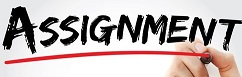

### ВОПРОС
---
Допустим, что мы знаем генеральное среднее $m_X$ и построили два эмпирических распределения оценок на основе большого количества наблюдений. И нашли мат.ожидание каждой оценки с помощью полученных эмпирических распределений соответственно: $m_{\bar x_{выб}}$, $m_{\bar x_{мм}}$. Также нашли и их дисперсии: $D_{\bar x_{выб}}$, $D_{\bar x_{мм}}$. Сравнивая эти характеристики, определите какая из оценок лучше. Выберите наиболее точный с вашей точки зрения ответ:

Лучше $\bar x_{выб}$, если ...
1.  ($m_{\bar x_{выб}} < m_{\bar x_{мм}}$) и ($D_{\bar x_{выб}} < D_{\bar x_{мм}})$;
2. ($m_{\bar x_{выб}} > m_{\bar x_{мм}})$ и ($D_{\bar x_{выб}} > D_{\bar x_{мм}}$);
3. ($|m_{\bar x_{выб}} - m_X|< |m_{\bar x_{мм}} - m_X|$);
4. ($|m_{\bar x_{выб}} - m_X|< |m_{\bar x_{мм}} - m_X|$) и ($D_{\bar x_{выб}} < D_{\bar x_{мм}}$).

### **Ставим эксперимент**
---
В качестве СВ X рассмотрим
- "Время подключения заявки", подчиняющуюся экспоненциальныму закону распределения с параметром (генеральным средним) Tmean=6.7;
- "Сумма выручки за день продажи кофемашин" (см. урок №7);


In [ ]:
# подгружаем нужные библиотеки и устанавливаем нужные значения параметров
import numpy as np
np.set_printoptions(precision=3)
import scipy.stats as stat
import matplotlib.pyplot as plt
plt.style.use('ggplot')

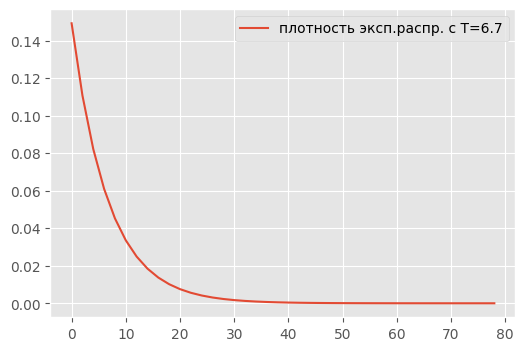

In [ ]:
# создадим экспоненциально распределенную СВ "Время подключения заявки"
Tmean = 6.7
exp_val = stat.expon(scale=Tmean)

# нарисуем плотность распределения интервала времени
xbins = np.arange(0, 80, 2)
plt.figure(figsize=(6, 4))
plt.plot(xbins, exp_val.pdf(xbins), label=f"плотность эксп.распр. с T={Tmean}")
plt.legend()
plt.show()

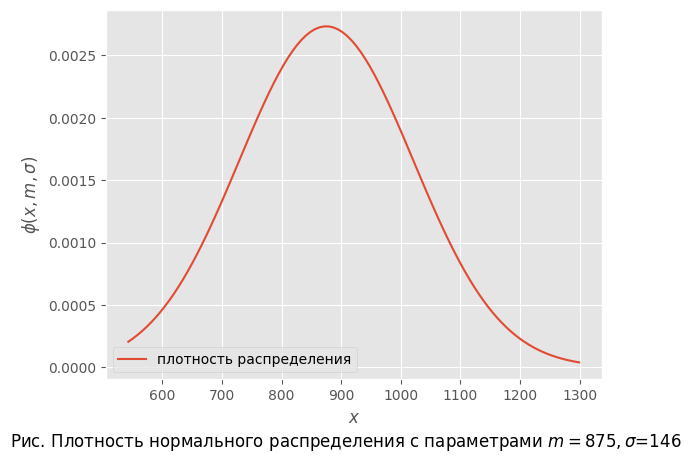

In [ ]:
# создадим нормально распределенную СВ "Сумма выручки за день продажи кофемашин" (см. урок №7)
mu = 875; sigma = 146
norm_rv = stat.norm(loc=mu, scale=sigma)

# --- построим график плотности распределения
# сгенерируем 100 значений
xvals = norm_rv.rvs(size=100)
# вычислим значения функции плотности вероятности нормального распределения
x_diapason = xvals.max() - xvals.min()
x = np.linspace(xvals.min() - 0.1 * x_diapason, xvals.max() + 0.1 * x_diapason, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf, label = 'плотность распределения' )
plt.ylabel('$\phi(x, m, \sigma)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Плотность нормального распределения с параметрами $m={mu}, \sigma$={sigma}', y=0);

ЭТАП 1. Провести много наблюдений значений статистик:
- генерируем выборки объема n из данной ГС: $(x_1, ..., x_2)$ (значение векторной СВ $\bar X$);
- вычисляем значения статистики №1 и статистики №2 на каждой выборке.

In [ ]:
def estimate_sample(rand_val, estim_fun, sample_size, N=1000):
    samples = [rand_val.rvs(size=n) for _ in range(N)]
    estims = np.array([estim_fun(X) for X in samples])
    return estims

stat2 = lambda X: (np.min(X)+ np.max(X))/2
stat3 = lambda X: (2*sum(X) - np.min(X) - np.max(X)) / (2*len(X)-2)

n = 10 # объем выборки
N = 1000 # кол-во наблюдений/выборок

rand_val = exp_val # выбираем экспоненциально распределенную СВ
#rand_val = norm_rv # выбираем нормально распределенную СВ
if rand_val == exp_val:
    m_X = Tmean
else:
    m_X = mu

estim1 = estimate_sample(rand_val=rand_val, estim_fun=np.mean, sample_size=n, N=N)
estim2 = estimate_sample(rand_val=rand_val, estim_fun=stat2, sample_size=n, N=N)
print(f"интервал изменения статистики №1: {min(estim1)} - {max(estim1)}")
print(f"интервал изменения статистики №2: {min(estim2)} - {max(estim2)}")

интервал изменения статистики №1: 1.5758868835651392 - 15.46360874396857
интервал изменения статистики №2: 2.4984333533404888 - 30.24169718919588


ЭТАП 2. Построим эмпирические гистограммы распределения оценок (оценим $h_i$), выбрав границы носителя и шаг (кол-во шагов)

In [ ]:
if rand_val == exp_val:
    # определить интервал изменения значений статистик
    x_min, x_max = 0, 37
    # разбить его на n подинтервалов
    nn = 37
    x_i = np.linspace(x_min, x_max, nn+1)
else:
    # определить интервал изменения значений статистик
    x_min, x_max = 16800, 18500
    # разбить его на nn подинтервалов
    nn = 26
    x_i = np.linspace(x_min, x_max, nn+1)

x_i

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.])

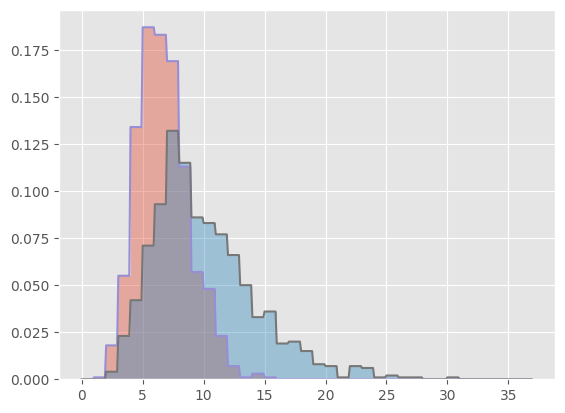

In [ ]:
def gen_rv_distrib_fun(vals: np.ndarray, xbins=None):
    if xbins is None:
        nbins = 20
        x_order = int(np.log10(vals.max() - vals.min()))
        x_min = round(vals.min() / 10**x_order - 0.5) * 10**x_order
        x_max = round(vals.max() / 10**x_order + 0.5) * 10**x_order
        xbins = x_min + np.arange(0, nbins + 1) * (x_max - x_min) / nbins
    h_i, x_i, _ = plt.hist(vals, bins=xbins, density=True, alpha=0.4)

    def rv_distrib_fun(x, h_i=h_i, x_i=x_i):
        if x_i[0] <= x <= x_i[-1]:
            i = int(len(h_i) * (x - x_i[0]) / (x_i[-1] - x_i[0]))
            #print(x, i)
            if i == len(h_i):
                i -= 1
            while not(x_i[i] <= x <= x_i[i+1]):
                if x < x_i[i]:
                    i -= 1
                else:
                    i += 1
            return h_i[i]
        else:
            return 0
    return rv_distrib_fun

estim1_fun = gen_rv_distrib_fun(estim1, x_i)
estim2_fun = gen_rv_distrib_fun(estim2, x_i)
x_arr = np.arange(x_i[0], x_i[-1], 0.1)
y1 = [estim1_fun(x) for x in x_arr]
y2 = [estim2_fun(x) for x in x_arr]
plt.plot(x_arr, y1)
plt.plot(x_arr, y2)
plt.show()

ЭТАП 3. Исследуем свойства распределений и определим какая оценка лучше

Для этого вычислим среднее и дисперсию для данных оценок с использованием полученных эмпирических распределений

In [ ]:
from scipy import integrate
import scipy.stats as stat

# зададим подинтегральные функции
f1_X = lambda x: estim1_fun(x) * x
f2_X = lambda x: estim2_fun(x) * x

# найдем M(X) - выполним интегрирование с помощью пакета
m1 = round(integrate.quad(f1_X, min(x_i), max(x_i))[0], 2)
m2 = round(integrate.quad(f2_X, min(x_i), max(x_i))[0], 2)

print(f"M[estim1] = {m1}, отклонение от истинного= {round(m1 - m_X, 3)}")
print(f"M[estim2] = {m2}, отклонение от истинного= {round(m2 - m_X, 3)}")


M[estim1] = 6.74, отклонение от истинного= 0.04
M[estim2] = 10.06, отклонение от истинного= 3.36


<ipython-input-8-0d598ad6e566>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  m1 = round(integrate.quad(f1_X, min(x_i), max(x_i))[0], 2)
<ipython-input-8-0d598ad6e566>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a

In [ ]:
# зададим подинтегральные функции
f1_X2 = lambda x: estim1_fun(x) * x**2
f2_X2 = lambda x: estim2_fun(x) * x**2

# найдем M(X) - выполним интегрирование с помощью пакета
m1_X2 = round(integrate.quad_vec(f1_X2, min(x_i), max(x_i))[0], 2)
m2_X2 = round(integrate.quad_vec(f2_X2, min(x_i), max(x_i))[0], 2)
D1 = m1_X2 - m1**2
D2 = m2_X2 - m2**2
sigma1, sigma2 = np.sqrt(D1), np.sqrt(D2)
print(f"D[estim1] = {round(D1, 2)}, СКО = {round(sigma1, 2)}")
print(f"D[estim2] = {round(D2, 2)}, СКО = {round(sigma2, 2)}")


D[estim1] = 4.84, СКО = 2.2
D[estim2] = 17.98, СКО = 4.24


собственно, мы этого и ожидали, ведь более лучшая оценка должна в среднем давать истинное значение параметра (быть несмещенной) и в среднем меньше от него отклоняться.

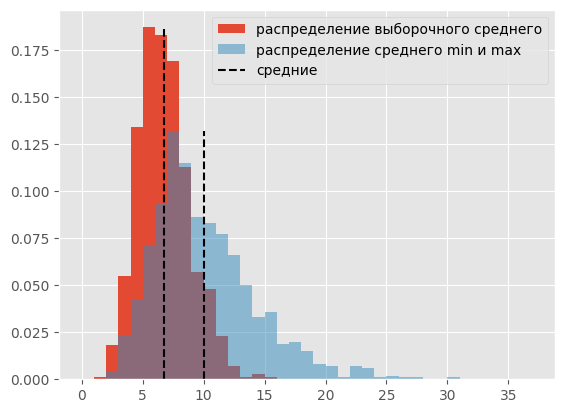

In [ ]:
plt.hist(estim1, bins=x_i, density=True, label='распределение выборочного среднего')
plt.hist(estim2, bins=x_i, density=True, alpha=0.5, label='распределение среднего min и max')
plt.vlines([m1, m2], ymin=0, ymax=[np.max(y1), np.max(y2)], colors='black', linestyles='--', label='средние')
plt.legend()
plt.show()

Для оценки среднего СВ, подчиняющейся нормальному закону распределения

при n=10 получили:
- M[estim1] = 17537.5, отклонение от истинного= 7.3
- M[estim2] = 17508.45, отклонение от истинного= -21.75
- D[estim1] = 1028.0, СКО = 32.06
- D[estim2] = 38136.98, СКО = 195.29

при n=20 получили:
- M[estim1] = 17537.92, отклонение от истинного= 1.12
- M[estim2] = 17549.95, отклонение от истинного= 13.15


Для оценки среднего СВ, подчиняющейся экспоненциальному закону распределения

при n=10 получили:
- M[estim1] = 6.66, отклонение от истинного= -0.04;
- M[estim2] = 9.94, отклонение от истинного= 3.24;
- D[estim1] = 4.41, СКО = 2.1
- D[estim2] = 15.35, СКО = 3.92

при n=20 получили:
- M[estim1] = 6.68, отклонение от истинного= -0.02
- M[estim2] = 12.53, отклонение от истинного= 5.83
- D[estim1] = 2.2, СКО = 1.48
- D[estim2] = 18.92, СКО = 4.35


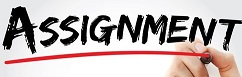

### ЗАДАНИЕ. Проверяем интуицию
---
Пусть при оценке генерального среднего для СВ "Время подключения клиента по заявке" мы использовали такие две оценки:
- выборочное среднее
$$x_{ср}(n) = \frac {X_1 + X_2 + ... + X_n}{n}$$
- выборочное средневзвешенное, в котором веса крайних значений выборки (x_min и x_max) в два раза меньше весов остальных значений выборки:
$$x_{взв}(n) = \frac {2*(X_1 + X_2 + ... + X_n) - max(X) - min(X)}{2n - 2}$$

Попробуйте спрогнозировать какими свойствами будет обладать средневзвешенная оценка:

ВАРИАНТЫ ОТВЕТОВ:

1. $m_{x_{взв}(n)}$ будет точнее, чем $m_{x_{ср}(n)}$ и $D_{x_{взв}(n)} ≤ D_{x_{ср}(n)}$ при любых n
2. $m_{x_{взв}(n)}$ будет точнее, чем $m_{x_{ср}(n)}$, но $D_{x_{взв}(n)} \ge D_{x_{ср}(n)}$ при любых n
3. $m_{x_{взв}(n)}$ будет сильнее отклоняться от Ген.Ср., чем $m_{x_{ср}(n)}$, но $D_{x_{взв}(n)} \le D_{x_{ср}(n)}$ при любых n
4. $m_{x_{взв}(n)}$ будет сильнее отклоняться от Ген.Ср., чем $m_{x_{ср}(n)}$ и $D_{x_{взв}(n)} \ge D_{x_{ср}(n)}$ при любых n

---
Итак, мы теперь понимаем какая оценка нам нужна - та, у которой закон распределения "жмется" к истинному значению параметра.


## **Свойства статистик**
---
Рассмотрим определения важных свойств оценок параметров распределений.

Пусть СВ **X** подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$, зависящем от данного параметра.

Например, для экспоненциального распределения $Θ = T_{ср}$ и $f_X(x, T_{ср}) = \frac {1}{T_{ср}} \cdot e^{-x/T_{ср}}$

В более общем случае, у плотности может быть несколько параметров, тогда параметр $Θ$ можно считать вектором параметров.

И пусть мы имеем некоторую выборку размером n: $$\bar X_n = (X_1, ..., X_n).$$

На основании этой выборки мы вычисляем некоторую статистику, которая является оценкой параметра $Θ$:

$$\hat \Theta_n = f(\bar X_n)$$

Данная статистика является СВ и подчинется некоторому закону распределения и имеет такие числовые характеристики как $m_{\hat \Theta_n}$ и $D_{\hat \Theta_n}$.

Рассмотрим основные свойства такой оценки.


### **Несмещенность оценки**
---
**Опр**. Оценка параметра $\hat Θ_n$ называется **несмещенной**, если $∀n$ выполняется:
$$M[\hat Θ_n] = Θ$$

Наше исследование показало, что оценка "выборочное среднее" является несмещенной. Отклонение $|[\hat Θ_n]_{cp} - Θ|$ очень мало при N=1000. Если же увеличить N (кол-во наблюдений статистики), то и отклонение уменьшится независимо от размера выборки n.

Несмещенность $x_{ср}(n)$ можно легко доказать:

$$M[x_{ср}(n)] = M[\frac {X_1 + X_2 + ... + X_n}{n}] = \frac {M[X_1] + M[X_2] + ... + M[X_n]}{n} = \frac {n \cdot m_X}{n} = m_X$$

Проанализируем на несмещенность **выборочную дисперсию**.

Случай 1. Нам известно генеральное среднее $m_X$

$$M[S_X^2(n)] = M[\frac {(X_1 - m_X)^2 + ... + (X_n - m_X)^2}{n}]= \frac {M[(X_1 - m_X)^2] + ... + M[(X_n - m_X)^2]}{n} = \frac {n \cdot D_X}{n} = D_X$$
Здесь док-во оказалось очень простым. Рассмотрим 2-й случай, когда вместо $m_X$ мы используем $x_{cp}$

---

Случай 2. Нам неизвестно генеральное среднее $m_X$ и мы используем выборочное среднее $x_{ср}(n)$

$$M[S_X^2(n)] = M[\frac {(X_1 - x_{ср}(n))^2 + ... + (X_n - x_{ср}(n))^2}{n}]= \frac {M[(X_1 - x_{ср}(n))^2] + ... + M[(X_n - x_{ср}(n))^2]}{n}$$

Рассмотрим чему равно одно слагаемое в числителе
$$M[(X_i - x_{ср}(n))^2] = M[X_i^2 - 2X_i \cdot x_{ср}(n) + x_{ср}(n)^2] = m_{X^2} - 2M[X_i \cdot \frac {X_1 + X_2 + ... + X_n}{n}] + M[(\frac {X_1 + X_2 + ... + X_n}{n})^2]$$

С учетом того, что
- $M[X_i \cdot X_j] = M[X_i] \cdot M[X_j] = m_X^2, i \ne j$;
- $M[X_i \cdot X_i] = m_{X^2}$

получаем после всех преобразований и сокращений (более подобный вывод далее, при анализе состоятельности):

$$M[(X_i - x_{ср}(n))^2] = m_{X^2} - 2M[X_i \cdot \frac {X_1 + X_2 + ... + X_n}{n} ]+ M[(\frac {X_1 + X_2 + ... + X_n}{n})^2] = m_{X^2} - \frac {1}{n} \cdot (m_{X^2} + (n-1)m_X^2) = \frac {n-1}{n} \cdot (m_{X^2} - m_X^2) = \frac {n-1}{n} \cdot D_X$$

Имеем:
$$M[S_X^2(n)] = \frac {n-1}{n} \cdot D_X = D_X - \frac {1}{n} \cdot D_X$$

Таким образом, видим, что эта оценка занижает дисперсию (подумайте почему?) и смещение составляет $\frac {1}{n} \cdot D_X$. С ростом n это смещение стремится к нулю и такая оценка называется ассимптотически несмещенной.

---





На практике, при небольших **n** лучше использовать **несмещенную оценку** для дисперсии:

$$S_X^2(n-1) = \frac {n}{n-1} \cdot S_X^2(n) = \frac {n}{n-1} \cdot \frac {(X_1 - x_{ср}(n))^2 + ... + (X_n - x_{ср}(n))^2}{n} = \frac {(X_1 - x_{ср}(n))^2 + ... + (X_n - x_{ср}(n))^2}{n-1}$$

Действительно:

$$M[S_X^2(n-1)] = \frac {n}{n-1} \cdot M[S_X^2(n)] = \frac {n}{n-1} \cdot \frac {n-1}{n} \cdot D_X = D_X$$


Точно также можно доказать, что оценка
$$\bar x_{мм} = \frac {min(\bar X) + max(\bar X)}{2}$$
является смещенной в случае несимметричного распределения СВ X (мы исследуем порядковые статистики на практическом занятии).

> Забегая вперед укажем, что порядковыми называют статистики, которые оценивают минимумы - максимумы СВ (например, для равномерно распределенной СВ) или квантили распределения.




### **Состоятельность оценки**
---
Мы уже видели, что хорошая оценка ($x_{ср}(n)$) улучшает свои характеристики с ростом **n**. Именно об этом и говорит свойство состоятельности.

#### ОПРОС.

Можно ли сказать, что если мы возьмем две фиксированных выборки с размерами соответственно $n_1, n_2, \; n_1 < n_2$, то гарантированно получим более точное значение оценки $x_{ср}(n_2)$, вычисленное по 2-й выборке, чем вычисленное по 1-й выборке $x_{ср}(n_1)$ меньшего размера?

ВАРИАНТЫ ОТВЕТа
1. ДА
2. НЕТ

#### Сходимость по вероятности
---
После ответа на вышеданный вопрос вы поймете зачем нам данное определение.

**Опр**. Говорят что (оценочная) статистика $f(X_1, ..., X_n)$ *сходится по вероятности* к значению $ϑ$ с ростом n, если:

$$\forall ɛ>0 \; ∃N: \; p(|f(X_1, ..., X_n) - ϑ|) < \varepsilon, \forall n > N$$
и обозначается так:

$$f(X_1, ..., X_n) \rightarrow^p_{n \rightarrow \infty} ϑ$$

#### Определение состоятельности
---
**Опр**. Для оценки $\hat Θ[n]$ параметра $Θ$ *состоятельность* означает, что она сходится по вероятности к истинному значению параметра $Θ$ с ростом n (объема выборки):
$$\hat Θ[n] \rightarrow^p_{n \rightarrow \infty} Θ$$

На языке характеристик оценок её состоятельность означает:
$$m_{\hat Θ[n]} \rightarrow Θ ({n \rightarrow \infty})$$
$$D_{\hat Θ[n]} \rightarrow 0 ({n \rightarrow \infty})$$

Если же оценка несмещенная, то достаточно убедиться, что ее дисперсия стремится к нулю с ростом n.

#### ПРИМЕР. Состоятельность оценки Xср
---

Мы уже знаем, что выборочное среднее - несмещенная оценка. Докажем, что ее дисперсия стремится к нулю с ростом n - размера выборки.

Найдем сначала Мат.Ожидание ее квадрата:

$$m_{x_{ср}^2(n)} = M[(\frac {X_1 + X_2 + ... + X_n}{n})^2] = \frac {1}{n^2} M[\sum_{i=1}^n {X_i^2} + \sum_{i=1}^n {\sum_{j=1, j \ne i}^n X_i \cdot X_j}] = \frac {1}{n^2} (\sum_{i=1}^n {M[X_i^2]} + \sum_{i=1}^n {\sum_{j=1, j \ne i}^n M[X_i \cdot X_j]}) = \frac {1}{n^2} (n \cdot m_{X^2} + n \cdot (n-1) m_X^2) = \frac {1}{n} (m_{X^2} + (n-1) m_X^2)$$

Тогда

$$D_{x_{ср}^2(n)} = m_{x_{ср}^2(n)} - m_{x_{ср}(n)}^2 = \frac {1}{n} (m_{X^2} + (n-1) m_X^2) - m_X^2 = \frac {1}{n} (m_{X^2} - m_X^2) = \frac {1}{n} D_X \rightarrow 0 \; (n \rightarrow \infty)$$

Таким образом, видим, что $x_{ср}^2(n)$ - несмещенная и состоятельная оценка.

Это можно подтвердить и экспериментально

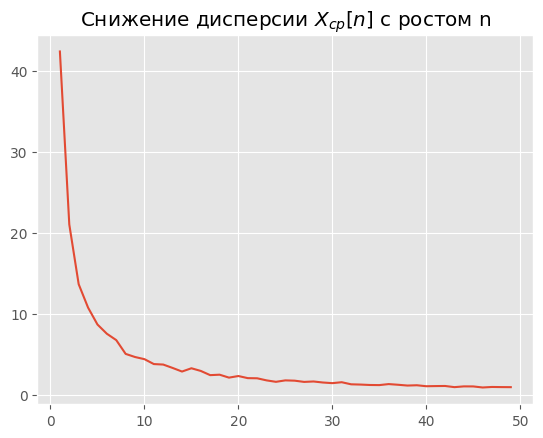

In [ ]:
import numpy as np
from scipy import integrate
import scipy.stats as stat

N = 1000 # кол-во наблюдений/выборок

rand_val = exp_val # выбираем экспоненциально распределенную СВ
# rand_val = norm_rv # выбираем нормально распределенную СВ

if rand_val == exp_val:
    m_X = Tmean
else:
    m_X = mu

D_Xcp = []
n_lst = list(range(1, 50))
for n in n_lst:
    estim1 = estimate_sample(rand_val=rand_val, estim_fun=np.mean, sample_size=n, N=N)
    D_Xcp.append(estim1.var())

plt.plot(n_lst, D_Xcp);
plt.title("Снижение дисперсии $X_{ср}[n]$ с ростом n");

Пjсмотрим, как меняется распределение $X_{ср}$ с ростом n

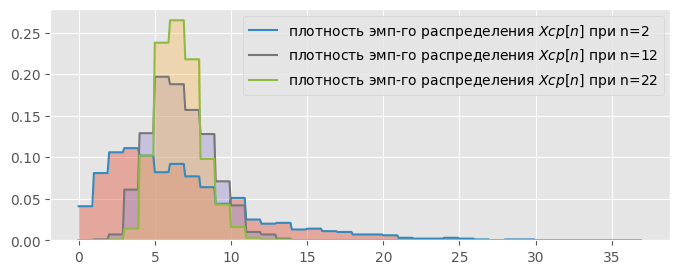

In [ ]:
# нарисуем гистограммы эмпирических распределений для Xcp при разных n
plt.figure(figsize=(8, 3))
n_lst = list(range(2, 23, 10))
for n in n_lst:
    estim1 = estimate_sample(rand_val=rand_val, estim_fun=np.mean, sample_size=n, N=N)
    estim1_fun = gen_rv_distrib_fun(estim1, x_i)
    x_arr = np.arange(x_i[0], x_i[-1], 0.1)
    y1 = [estim1_fun(x) for x in x_arr]
    plt.plot(x_arr, y1, label=f"плотность эмп-го распределения $Xcp[n]$ при n={n}")

plt.legend()
plt.show()

ВИдно что с ростом **n** и разброс значений уменьшается и распределение напоминает нормальное

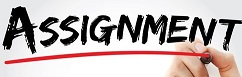

#### ОПРОС
---
Что вы думаете о состоятельности выборочной оценки дисперсии:

$$S^2_X(n)= \frac {(X_1−m_X)^2+...+(X_n−m_X)^2}{n}$$


1. состоятельна
2. не состоятельна
3. это зависит от распределения СВ X
4. ассимптотически состоятельна

### **Эффективность оценки**
---
Итак, мы выяснили, что хорошая оценка параметра должна быть несмещенной и состоятельной. Но стремление дисперсии состоятельной оценки к нулю может быть разным. И, если есть возможность выбирать оценки, то из всех несмещенных и состоятельных надо выбирать ту, у которой дисперсия при фиксированном **n** наименьшая (при любых фиксированых **n**).

Т.е., если есть несмещенные и состоятельные оценки одного и того же параметра $Θ$:

$$\hat \Theta_n = f(\bar X_n)$$
и
$$\hat \Theta^{(i)}_n = f_i(\bar X_n),$$
то выбрать надо ту оценку, у которой дисперсия наименьшая:

$$D_{\hat \Theta_n} \le D_{\hat \Theta^{(i)}_n} \; \forall n=1..\infty, \, \forall i$$

**Опр.** Оценка $\hat \Theta_n$ параметра $\Theta$ называется эффективной, если она является несмещенной, состоятельной и имеет наименьшую возможную дисперсию.


Осталось теперь выяснить, а как можно оценить снизу дисперсию оценки параметра? Какая дисперсия является наименьшей при заданном **n**?

## **Информация Фишера**
---
(см. https://en.wikipedia.org/wiki/Fisher_information)

Итак, пусть у нас есть СВ **X**, которая подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$.

Информация Фишера (не путать с кол-вом информации по Шеннону) - это некоторый способ оценки информации, которую дает нам наблюдение СВ X, относительно неизвестного параметра $\theta$.

Если $f$ резко меняется с изменением параметра $\theta$, то должно быть легко обнаружить "истинное" значение параметра $\theta$ по имеющимся наблюдениям, или по-другому, данные $X$ обеспечивают нас значительной информацией о значении параметра $\theta$.

Если же $f$ является плоской и растянутой, тогда нам потребуется значительно большая выборка значений X для оценки "истинного" значения параметра $\theta$. Т.е. одно наблюдение даст нам меньше информации в этом случае.

Пусть мы в результате наблюдений СВ **X** имеем выборку ее значений **$\bar X$** размера n. Так как каждое значение СВ X мы получали независимо от других полученных значений в отдельном эксперименте, то тогда вероятность получения выборки будет равна произведению вероятностей получению каждого отдельного значения:

$$p(\bar X = (x_1, .., x_n)) = ∏_{i=1}^n {p(X=x_i)} = ∏_{i=1}^n {f_X(x_i, Θ) dx_i}$$

**Опр.** Функцией правдоподобия выборки $\bar X = (x_1, .., x_n)$ будем называть функцию:
$$likelihood(x_1, .., x_n) = ∏_{i=1}^n {f_X(x_i, Θ)}$$

Понятно название данной функции - чем более вероятные значения мы получим в выборке, тем больше будет и функция правдоподобия!



### ПРИМЕР на функцию правдоподобия
---
Пусть СВ X="Рост сотрудников компании" подчиняется нормальному закону распределения с параметрами $m_X = 172, \; σ = 8$.

Пусть мы измерили рост трех человек из одного отдела (173, 169, 175) и трех человек из другого отдела (179, 182, 185).

Какие измерения являются более правдоподобными (см. рис. ниже)?

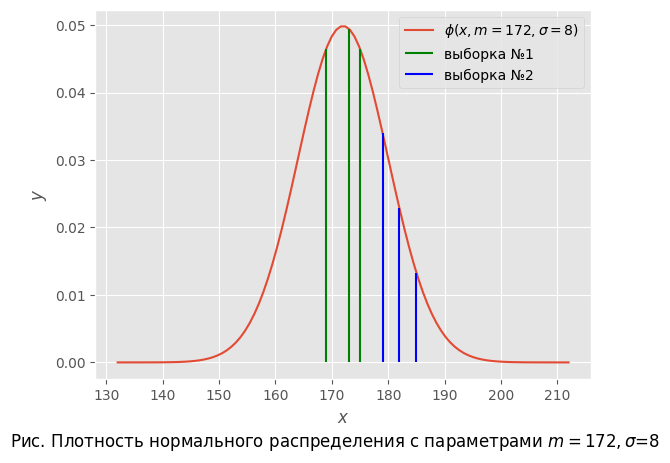

In [ ]:
mu = 172; sigma = 8
norm_rv = stat.norm(loc=mu, scale=sigma)
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 100)
X1 = np.array([173.0, 169., 175.])
X2 = np.array([179.0, 182., 185.])

plt.plot(x, norm_rv.pdf(x), label=f'$\phi(x, m={mu}, \sigma = {sigma})$')
plt.vlines(X1, ymin=0, ymax=norm_rv.pdf(X1), color='green', label='выборка №1')
plt.vlines(X2, ymin=0, ymax=norm_rv.pdf(X2), color='blue', label='выборка №2')
plt.ylabel('$y$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Плотность нормального распределения с параметрами $m={mu}, \sigma$={sigma}', y=0);

In [ ]:
print(f"Likelihood(X1) = {np.array(norm_rv.pdf(X1)).prod()}")
print(f"Likelihood(X2) = {np.array(norm_rv.pdf(X2)).prod()}")

Likelihood(X1) = 0.00010690417081476738
Likelihood(X2) = 1.0339746303255347e-05


Основная идея использования функции правдоподобия при построении оценки заключается в том, чтобы оценку выбрать так, чтобы максимизировать функцию правдоподобия на данной выборке:

$$likelihood(\bar X, \hat Θ) = L(\bar X, \hat Θ) = ∏_{i=1}^n {f_X(x_i, \hat Θ)} → \max$$

Фактически, функция правдоподобия есть не что иное, как плотность распределения для векторной СВ $\bar X$:

$$L(\bar X, Θ) = f_{\bar X}(x_1, ..., x_n).$$

Действительно:
$$\int .. \int L(\bar X, Θ) dx_1 .. dx_n = \int .. \int f_X(x_1, Θ) \cdot .. \cdot f_X(x_n, Θ) dx_1 .. dx_n = \int f_X(x_1, Θ) dx_1 \cdot .. \int f_X(x_n, Θ) dx_n = 1 \cdot .. \cdot 1 = 1$$

На практике часто работают с логарифмом от функции правдоподобия:

$$\log L(\bar X, \hat Θ) = \sum_{i=1}^n {\log f_X(x_i, \hat Θ)} → \max$$

Но если про $\log L(\bar X, \hat Θ)$ при $\hat Θ = Θ$ мы ничего не знаем, то вот про производную по $Θ$ в самом оптимальном случае мы можем сформулировать утверждение

**Опр**. Частная производная по $\theta$ натурального логарифма функции правдоподобия называется **оценкой** (score):

- для одного наблюдения СВ X:
$$score(x, \hat \Theta) = \frac {∂}{∂\hat Θ} {\log L(x, \hat \Theta)} = \frac {∂}{∂\hat Θ} {\log f_X(x, \hat \Theta)}$$

- для выборки:
$$score(\bar X, \hat \Theta) = \frac {∂}{∂\hat Θ} {\log L(\bar X, \hat \Theta)} = \frac {∂}{∂\hat Θ} {\log ∏_{i=1}^n {f_X(x_i, \hat Θ)}}$$

Если мы "угадали" с оценкой параметра $\Theta$, то получим следующее мат.ожидание для $score$ (одно наблюдение):

$$M[score(X, \hat \Theta)| \hat \Theta = Θ] = \int_ℜ \frac {∂}{∂Θ} {\log L(x, \Theta)} \cdot f_X(x, \Theta) dx = \int_ℜ \frac {\frac {∂}{∂Θ} {f_X(x, \Theta)}}{f_X(x, \Theta)} \cdot f_X(x, \Theta) dx$$

$$M[score(X, \hat \Theta)| \hat \Theta = Θ] = \int_ℜ \frac {∂}{∂Θ} {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} \int_ℜ {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} 1 = 0$$

Но если производная равна нулю, то это означает, что при истинном значении параметра МО функции правдоподобия имеет экстремальное значение (надеемся, что максимум).

Опр. **Информация Фишера** определяется как дисперсия $score$ для одного наблюдения:

$$𝓕(\Theta) = D[score(X, \Theta)| X \in f_X(x, Θ)] = D[score(X, \Theta)| Θ]$$

Так как $M[score] = 0$, то
$$D[score] = M[score^2] - M^2[score] = M[score^2]$$

или

$$𝓕(\Theta) = M[score^2(X, \Theta)| Θ] = \int_ℜ (\frac {∂}{∂Θ} {\log f_X(x, \Theta)})^2 \cdot f_X(x, \Theta) dx$$



**Свойства информации Фишера.**

1. Так как информация Фишера - это дисперсия или мат.ожидание, то она не является случайной величиной. Это просто число: $𝓕(\Theta) \in ℜ$

2. $𝓕(\Theta) \ge 0, \; \forall Θ$

3. $𝓕(\Theta) = - M[\frac {∂^2}{∂Θ^2} {\log f_X(x, \Theta)} | Θ]$

т.е. 2-е и 3-е свойство сообщают нам следующее:
> если МО первой производной от логарифма функции правдоподобия при $\hat Θ = Θ$ равна 0, то вторая производная от этой функции при $\hat Θ = Θ$ меньше нуля и это означает, что при при $\hat Θ = Θ$ функция правдоподобия имеет точку максимума!

И еще один вывод можно сделать, что **информация Фишера** характеризует **кривизну** графика кривой для $y = M[\log L(X, Θ)]$ вблизи оценки максимального правдоподобия.

Если информация Фишера (кривизна) мала, то это означает "плоский" максимум, иначе - "крутой" максимум.

Т.е., по идее, высокое значение информации Фишера говорит нам о том, что одно наблюдение дает нам много информации относительно параметра распределения $Θ$. Это означает, что распределение СВ X должно иметь ярко выраженную моду и небольшую дисперсию.


### ПРИМЕР с вычислением информации Фишера
---

Рассмотрим СВ X, распределенную по закону Бернулли с параметром p, т.е.

$$p(x) =
  \begin{cases}
    p       & \quad  x = 1\\
    1-p     & \quad  x = 0
  \end{cases}
$$

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия:
$$L(X, p) = p^X \cdot (1 - p)^{1-X}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(X, p) = X \ln p + (1 - X) \ln (1-p)$$

3. Частная производная по $σ$:
$$\frac {∂}{∂p} \ln L(X, p) = \frac {X}{p} - \frac {1 - X}{1 - p}$$

3. Вторая частная производная по $σ$:
$$\frac {∂^2}{∂p^2} \ln L(X, p) = - \frac {X}{p^2} - \frac {1 - X}{(1 - p)^2}$$

4. Информация Фишера:
$$ℱ(p) = - M[\frac {∂^2}{∂p^2} \ln L(X, p) | p] = M[\frac {X}{p^2}] + M[\frac {1 - X}{(1 - p)^2}] = \frac {p}{p^2} + \frac {1 - p}{(1 - p)^2} = \frac {1}{p} + \frac {1}{1 - p} = \frac {1}{p(1 - p)}$$


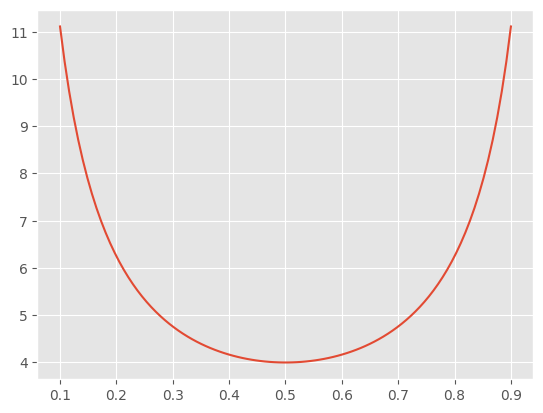

In [21]:
p_i = np.linspace(0.1, 0.9, 100)
f_i = np.array([1/p/(1-p) for p in p_i])
plt.plot(p_i, f_i);

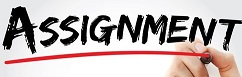

### ЗАДАНИЕ.
---
Для выведенных ниже плотностей распределения расставьте их в порядке возрастания информации Фишера:

1. A, B, C
2. A, C, B
3. C, A, B
4. C, B, A

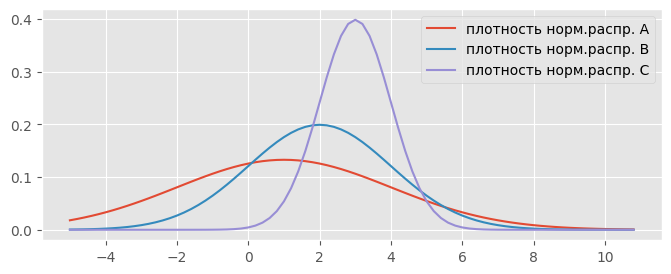

## **Оценка Рао-Крамера**
---

Рассмотрим несмещенную оценку $\hat Θ(X)$ параметра $Θ$, т.е.

$$M[\hat Θ(X) - Θ | Θ] = \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = 0, \; \forall Θ$$

Если независимо от значения $Θ$ это выражение равно 0, то и ее производная по $Θ$ также будет равна 0:

$$\frac {∂}{∂Θ} \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = \int \frac {∂}{∂Θ} [(\hat Θ(x) - Θ) f_{X}(x, Θ)] dx = \int (\hat Θ(x) - Θ) \frac {∂}{∂Θ} f dx - \int f dx = 0$$

так как $\int f dx = 1$
и
$$\frac {∂}{∂Θ} f = f \frac {∂}{∂Θ} \log f, $$

то получим:

$$\int (\hat Θ(x) - Θ) f \frac {∂}{∂Θ}(\log f) dx = 1$$

Возведем левую и правую части в квадрат, выделим множители и, используя неравенство Коши-Шварца
$$(\int f(x) g(x) dx)^2 \le \int f^2(x) dx \cdot \int g^2(x) dx$$

получим:

$$1 = (\int (\hat Θ(x) - Θ) f \frac {∂}{∂Θ}(\log f) dx)^2 \le [\int (\hat Θ - Θ)^2 f dx] \cdot [\int (\frac {∂}{∂Θ}(\log f))^2 f dx] = D_{\hat Θ} \cdot ℱ(Θ)$$

отсюда следует оценка Рао-Крамера снизу для дисперсии $\hat Θ$:

$$D_{\hat Θ} \ge \frac {1}{ℱ(Θ)}$$

Т.е. если для несмещенной оценки  $$D_{\hat Θ} = \frac {1}{ℱ(Θ)},$$

то это и есть самая эффективная оценка.


## **Resume**
---
Нас будут интересовать статистики, которые:

- являются несмещенными (или ассимптотически несмещенными);
- являются состоятельными;
- имеют как можно меньшую дисперсию;


### ПРИМЕР с вычислением информации Фишера
---

Рассмотрим СВ $X \in N(0, σ)$ (нормальный закон со средним = 0 и СКО = $σ$)

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия  (плотность распределения):
$$ϕ(x, σ) = \frac {1}{\sqrt{2π}σ} e^{- \frac {x^2}{2σ^2}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln ϕ(x, σ) = -\frac {1}{2} \ln(2π) - \lnσ - \frac {x^2}{2σ^2}$$

3. Частная производная по $σ$:
$$\frac {∂}{∂σ} \ln ϕ(x, σ) = - \frac {1}{σ} + \frac {x^2}{σ^3} = \frac {x^2 - σ^2}{σ^3} = \frac {\frac {x^2}{σ^2} - 1}{σ}$$


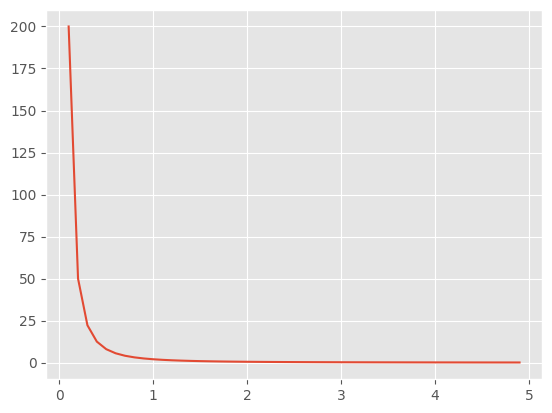

In [25]:
from scipy import integrate
import scipy.stats as stat

def fisher_info(sigma, x_min = -20.0, x_max=20.0):
    norm_rv = stat.norm(loc=0, scale=sigma)
    d_logL = lambda x: ((x / sigma)**2 - 1) / sigma

    # зададим подинтегральные функции
    f = lambda x: norm_rv.pdf(x) * d_logL(x)**2

    # выполним интегрирование с помощью пакета
    info = round(integrate.quad(f, x_min, x_max)[0], 5)
    return info

sigma_min, sigma_max = 0.1, 5
sigmas = np.arange(sigma_min, sigma_max, 0.1)

fishers = [fisher_info(sigma) for sigma in sigmas]
plt.plot(sigmas, fishers);